###Lenguajes seleccionados: Java, Python, C#, C++

In [47]:
# -*- coding: utf-8 -*-

#lectura de datos 

import json
dataset_path = "dataset-230415-11.56.txt"
data = []
f = open(dataset_path, "r")
for line in f:
	try:
		tweet = json.loads(line)
		data.append(tweet)
	except Exception as ex:
		#print("Error :", ex)
		continue
print(len(data))
f.close()
import pandas as pd
tweets = pd.DataFrame()
tweets['text'] = [t['text'] for t in data]
#TODO: change lang by language at new reload
tweets['language'] = [t['lang'] for t in data]
tweets['country'] = [t['place']['country'] if t['place'] else None for t in data]

# function to search keyword programming languag in text
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word+" ", text)
    if match:
        return True
    return False

# En la columna text de nuestro DataFrame buscamos las ocurrencias de cada palabra a analizar 
# ... Incluir posible grafico
#TODO: #java #python #javascript
tweets['python'] = tweets['text'].apply(lambda tweet: word_in_text('python', tweet))
tweets['java'] = tweets['text'].apply(lambda tweet: word_in_text('java', tweet))
tweets['javascript'] = tweets['text'].apply(lambda tweet: word_in_text('javascript', tweet))

# Contabilizando 
print (tweets['python'].value_counts()[True])
print (tweets['java'].value_counts()[True])
print (tweets['javascript'].value_counts()[True])

tweets_by_prg_lang_count1 = (tweets['python'].value_counts()[True], tweets['java'].value_counts()[True], tweets['javascript'].value_counts()[True])
#prg_langs = ('python', 'java', 'javascript')
# diccionario para describir mejor los datos de los lenguajes de programación durante
# la búsqueda en el dataset
proglangs = {'python':'python', 'java':'java', 'javascript':'javascript'}
x = list(range(len(proglangs)))

1598
355
812
23


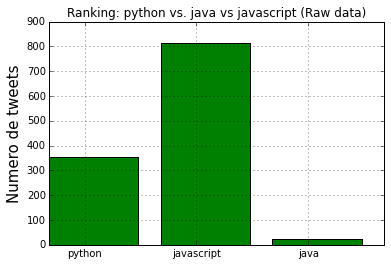

In [32]:
# Plotting
#import matplotlib.pyplot as plt
%matplotlib inline
#revisar 
import matplotlib.pyplot as plt
fig, axis =  plt.subplots()
plt.bar(x, tweets_by_prg_lang_count1, 0.8, alpha=1, color='g')

axis.set_ylabel('Numero de tweets', fontsize=15)
axis.set_title('Ranking: python vs. java vs javascript (Raw data)')
axis.set_xticks([p + 0.4 * 0.8 for p in x])
axis.set_xticklabels(list(proglangs.keys()))
plt.grid()

Ahora vamos a focalizarnos en tweets  que tengan que ver más con lenguajes de programación en sí, seleccionando por ejemplo aquellos tweets que contengan las palabras clave: "programming" o "programacion" teniendo cuidado además de las tildes

In [35]:
tweets["programming"] = tweets['text'].apply(lambda t: word_in_text('programming',t))
tweets["programación"] = tweets['text'].apply(lambda t: word_in_text('programación',t))
tweets["programacion"] = tweets['text'].apply(lambda t: word_in_text('programacion',t))
tweets["relevante"] = tweets['text'].apply(lambda t: word_in_text('programming',t) 
                                            or word_in_text('programación',t)
                                            or word_in_text('programacion',t))

In [36]:
#Nos quedamos solo con los tweets relevantes
tweets = tweets[tweets["relevante"] == True]
tweets[:5]

,text,language,country,python,java,javascript,programming,programación,programacion,relevante
26,Developing Scalable Apps in #Python\nwith #Goo...,en,None,False,False,False,True,False,False,True
66,RT @devbattles: How I Learned to Stop Worrying...,en,None,True,False,False,True,False,False,True
110,RT @imissyouoa: #linux Qt Creator 3.4 Brings C...,en,None,False,False,False,True,False,False,True
149,Deal! Learn for $49 Only: Step By Step Java Pr...,en,None,False,True,False,True,False,False,True
179,@_ruunyan I WAS TALKING ABOUT THE PROGRAMMING ...,en,None,True,False,False,True,False,False,True


Ahora podemos observar que la cantidad de tweets relevantes, relacionados con temas de programación,
entre java y python difieren únicamente en uno

In [37]:
###print (tweets[tweets['relevante'] == True]['python'].value_counts()[True])
###print (tweets[tweets['relevante'] == True]['java'].value_counts()[True])
###print (tweets[tweets['relevante'] == True]['javascript'].value_counts()[True])
print (tweets['python'].value_counts()[True])
print (tweets['java'].value_counts()[True])
print (tweets['javascript'].value_counts()[True])

10
11
1


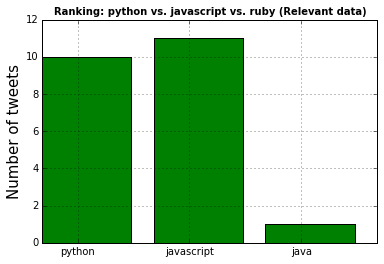

In [38]:
tweets_by_prg_lang_count = [tweets[tweets['relevante'] == True]['python'].value_counts()[True], 
                      tweets[tweets['relevante'] == True]['java'].value_counts()[True], 
                      tweets[tweets['relevante'] == True]['javascript'].value_counts()[True]]
x_pos = list(range(len(proglangs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang_count, width,alpha=1,color='g')
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: python vs. javascript vs. ruby (Relevant data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(list(proglangs.keys()))
plt.grid()

In [7]:
tweets_by_prg_lang_count[:10]

[10, 11, 1]

In [8]:
#TODO: tweets['programming'==True or 'programacion'==True]
#tweets['programming'].value_counts()[True]
#tweets['programming'].value_counts().get(True,0)
# Se necesita prevenir el caso en el que no existan datos para las palabras clave buscadas
#tweets['programación'].value_counts().get(True,0)

Filtramos los lenguajes del texto  para el posterior análisis sentimental, error 'aux'

In [100]:
###aux = tweets
tweets = tweets[(tweets.language == 'es') | (tweets.language == 'en')]

In [70]:
tweets[:10]

,text,language,country,python,java,javascript
0,threadly 0.6.0: Threading pool and scheduler f...,en,None,True,False,False
2,RT @grailsinfo: New Blog: Groovy now runs fast...,en,None,False,True,False
3,"RT @josevalim: Elixir has ideas from Java, C#,...",en,None,False,False,False
5,@JESUSGAMER444 https://t.co/dmZXwJAKwN htt...,es,None,False,True,False
6,Deal! Learn for $10 Only: Game Development Fun...,en,None,True,False,False
7,#Trabajo en #Badajoz Analista Programador C++ ...,es,None,False,False,False
8,RT @hseeberger: And the winners are ... #akka ...,en,None,False,True,False
9,Prepared statements ftw #Java #MySQL,en,None,False,True,False
10,PROGRAMADOR JAVA http://t.co/gkcMFoXaJs #emple...,es,None,False,True,False
11,Consultor Junior Java http://t.co/qucJHQo8Fo #...,es,None,False,True,False


##Preparación de la data para el análisis sentimental

Por cada lenguaje de programación que se desea analizar creamos un diccionario con los datos
necesarios para enviar al analizador sentimental

In [82]:
insentiments = dict()
for proglang in proglangs.keys():
    # En español
    chunk_es = tweets[(tweets[proglang] == True) & (tweets.language == 'es')]
    chunk_es = chunk_es.ix[:,['text']]
    chunk_es['query'] = proglang
    insentiments[proglang] = {'es': '{"language": "es", "data": %s }' % 
                            chunk_es.to_json(orient='records')}
    # Enn inglés
    chunk_en = tweets[(tweets[proglang] == True) & (tweets.language == 'en')]
    chunk_en = chunk_en.ix[:,['text']]
    chunk_en['query'] = proglang
    # ojo: no se reemplaza el contenido del diccionario sino que se agrega
    insentiments[proglang].update({'en': '{"language": "en", "data": %s }' % 
                            chunk_en.to_json(orient='records')})

In [99]:
# Formateo de los datos que vamos a enviar al analizador
pd.DataFrame(insentiments)
pd.tool

,java,javascript,python
en,"{""language"": ""en"", ""data"": [{""text"":""RT @grail...","{""language"": ""en"", ""data"": [{""text"":""Java Scri...","{""language"": ""en"", ""data"": [{""text"":""threadly ..."
es,"{""language"": ""es"", ""data"": [{""text"":""@JESUSGAM...","{""language"": ""es"", ""data"": [] }","{""language"": ""es"", ""data"": [{""text"":""que el HT..."


##Análisis Sentimental

In [61]:
def parse_response(json_response):
    # obviamos los valores neutrales
    negative_tweets, positive_tweets = 0, 0
    for t in json_response["data"]:
        if int(t["polarity"]) == 0:
            negative_tweets += 1
        elif int(t["polarity"]) == 4:
            positive_tweets += 1
    return negative_tweets, positive_tweets

In [89]:
#La version del articulo de Fernando Marengo  usa urllib2
#intentamos en nuestra version usar algo mas moderno para enviar la data en formato
#JSON directamente en vez de transformarlo a str

#import urllib2
import requests
URL_SENTIMENT140 = "http://www.sentiment140.com/api/bulkClassifyJson"
###req = urllib.request.http.client.Request(URL_SENTIMENT140)
###req.add_header('Content-Type', 'application/json')
###response = urllib2.urlopen(req, str(result))
outsentiments = dict()
for proglang in insentiments.keys():
    response = requests.post(URL_SENTIMENT140, insentiments[proglang]['es'])
    es = dict()
    es['negative'], es['positive'] = parse_response(response.json())
    outsentiments[proglang] = {'es': es}
    response = requests.post(URL_SENTIMENT140, insentiments[proglang]['en'])
    en = dict()
    en['negative'], en['positive'] = parse_response(response.json())
    # Ojo, no se reemplaza
    outsentiments[proglang].update({'en' : en})

###TODO: Cambiar los diccionarios por un DataFrame digamos plano
 
|Programming language | language | negative | positive |
|---------------------|:--------:|---------:|---------:|
|         x           |    x     |     x    |    x     |

In [97]:
# Solo para presentación legible
pd.DataFrame(outsentiments)

,java,javascript,python
en,"{'positive': 66, 'negative': 15}","{'positive': 3, 'negative': 0}","{'positive': 66, 'negative': 3}"
es,"{'positive': 1, 'negative': 0}","{'positive': 0, 'negative': 0}","{'positive': 0, 'negative': 0}"


In [102]:
x=pd.DataFrame(outsentiments)
x.plot()

TypeError: Empty 'DataFrame': no numeric data to plot

##Solo pruebas por separado ........

In [11]:
# partiendo el DataFrame para ls pruebas que siguen
subtweets = tweets.ix[:10, ['text', 'language', 'query']]

In [12]:
subtweets.columns

Index(['text', 'language', 'query'], dtype='object')

In [ ]:
###ERROR
#quitamos los indices acarreados del pandas.DataFrame
jsontweets = subtweets.to_json(orient="records")
#strweets = json.dumps(jsontweets)

In [13]:
jsontweets

'[{"text":"threadly 0.6.0: Threading pool and scheduler for python http:\\/\\/t.co\\/lH4M1fg9Yk","lang":"en"},{"text":"RT @grailsinfo: New Blog: Groovy now runs faster than Java on mobile http:\\/\\/t.co\\/16nlVqlSAK #groovy #grails","lang":"en"},{"text":"RT @josevalim: Elixir has ideas from Java, C#, Python, Ruby, Haskell, F#, etc. Never stop looking at what other communities are doing!","lang":"en"},{"text":"@JESUSGAMER444  https:\\/\\/t.co\\/dmZXwJAKwN    https:\\/\\/t.co\\/Gz66mpR9xt te descargas el launcher y ocupas de tener java 7","lang":"es"},{"text":"Deal! Learn for $10 Only: Game Development Fundamentals with Python http:\\/\\/t.co\\/ebjuNaGSCT","lang":"en"},{"text":"#Trabajo en #Badajoz Analista Programador C++ y\\/o ProC, Badajoz: Randstad Technologies Madrid \\u2013 Badajoz \\u2013 Astu\\u2026\\u2026 http:\\/\\/t.co\\/I6uff2V7KC","lang":"es"},{"text":"RT @hseeberger: And the winners are ... #akka and #java 8. #jaxcon http:\\/\\/t.co\\/GqrkU3nyP1","lang":"en"},{"text":"Prep

In [14]:
#acomodamos la data para formatearla de acuerdo a lo que pide la app sentiment140
# problemas de colición entre el objeto json y el metodo format() de python3
strweets = '{"language" : "auto", "data" : %s }' % jsontweets

In [15]:
strweets

'{"language" : "auto", "data" : [{"text":"threadly 0.6.0: Threading pool and scheduler for python http:\\/\\/t.co\\/lH4M1fg9Yk","lang":"en"},{"text":"RT @grailsinfo: New Blog: Groovy now runs faster than Java on mobile http:\\/\\/t.co\\/16nlVqlSAK #groovy #grails","lang":"en"},{"text":"RT @josevalim: Elixir has ideas from Java, C#, Python, Ruby, Haskell, F#, etc. Never stop looking at what other communities are doing!","lang":"en"},{"text":"@JESUSGAMER444  https:\\/\\/t.co\\/dmZXwJAKwN    https:\\/\\/t.co\\/Gz66mpR9xt te descargas el launcher y ocupas de tener java 7","lang":"es"},{"text":"Deal! Learn for $10 Only: Game Development Fundamentals with Python http:\\/\\/t.co\\/ebjuNaGSCT","lang":"en"},{"text":"#Trabajo en #Badajoz Analista Programador C++ y\\/o ProC, Badajoz: Randstad Technologies Madrid \\u2013 Badajoz \\u2013 Astu\\u2026\\u2026 http:\\/\\/t.co\\/I6uff2V7KC","lang":"es"},{"text":"RT @hseeberger: And the winners are ... #akka and #java 8. #jaxcon http:\\/\\/t.co\\/GqrkU3n

In [16]:
#La version del articulo de Fernando Marengo  usa urllib2
#intentamos en nuestra version usar algo mas moderno para enviar la data en formato
#JSON directamente en vez de transformarlo a str

#import urllib2
import requests
URL_SENTIMENT140 = "http://www.sentiment140.com/api/bulkClassifyJson"
###req = urllib.request.http.client.Request(URL_SENTIMENT140)
###req.add_header('Content-Type', 'application/json')
response = requests.post(URL_SENTIMENT140, strweets)
###response = urllib2.urlopen(req, str(result))

In [17]:
#Version del articulo original usa reponse.read()
#ahora usamos json , alternativa moderna
jsonresponse = response.json()

In [18]:
jsonresponse

{'data': [{'lang': 'en',
   'meta': {'language': 'en'},
   'polarity': 2,
   'text': 'threadly 0.6.0: Threading pool and scheduler for python http://t.co/lH4M1fg9Yk'},
  {'lang': 'en',
   'meta': {'language': 'en'},
   'polarity': 2,
   'text': 'RT @grailsinfo: New Blog: Groovy now runs faster than Java on mobile http://t.co/16nlVqlSAK #groovy #grails'},
  {'lang': 'en',
   'meta': {'language': 'en'},
   'polarity': 2,
   'text': 'RT @josevalim: Elixir has ideas from Java, C#, Python, Ruby, Haskell, F#, etc. Never stop looking at what other communities are doing!'},
  {'lang': 'es',
   'meta': {'language': 'es'},
   'polarity': 2,
   'text': '@JESUSGAMER444  https://t.co/dmZXwJAKwN    https://t.co/Gz66mpR9xt te descargas el launcher y ocupas de tener java 7'},
  {'lang': 'en',
   'meta': {'headline': True, 'language': 'en'},
   'polarity': 2,
   'text': 'Deal! Learn for $10 Only: Game Development Fundamentals with Python http://t.co/ebjuNaGSCT'},
  {'lang': 'es',
   'meta': {'language'

The polarity values are: 
* 0: negative
* 2: neutral
* 4: positive

In [22]:
def parse_response(json_response):
    # obviamos los valores neutrales
    negative_tweets, positive_tweets = 0, 0
    for t in json_response["data"]:
        if int(t["polarity"]) == 0:
            negative_tweets += 1
        elif int(t["polarity"]) == 4:
            positive_tweets += 1
    return negative_tweets, positive_tweets

In [23]:
parse_response(jsonresponse)

(0, 0)